# Análise Exploratória de Dados

**Dados a serem utilizados:**

[Link para os dados](https://github.com/neylsoncrepalde/introducao_ao_r/blob/master/dados/pes_2012.csv?raw=true)

# Importando os dados

In [ ]:
import pandas as pd
dados = pd.read_csv('https://raw.githubusercontent.com/neylsoncrepalde/introducao_ao_r/master/dados/pes_2012.csv')
dados.head()

,V0101,UF,V0302,V8005,V0404,V4803,V4718,V4720,V4729
0,2012,Rondônia,Masculino,48,Branca,15 anos ou mais,3000,3000,232
1,2012,Rondônia,Feminino,48,Branca,15 anos ou mais,3000,3000,232
2,2012,Rondônia,Feminino,23,Branca,15 anos ou mais,1100,1100,232
3,2012,Rondônia,Feminino,21,Branca,14 anos,1100,1100,232
4,2012,Rondônia,Feminino,54,Branca,15 anos ou mais,NaN,460,232


# Realizando algumas análises do dataset


In [ ]:
# alterando o nome das colunas para facilitar o entendimento
colunas = {'V0101': 'Ano',
           'UF': 'Estado',
           'V0302': 'Sexo',
           'V8005': 'Idade',
           'V0404': 'Etnia',
           'V4803': 'Escolaridade',
           'V4718': 'Renda Principal',
           'V4720': 'Renda Total',
           'V4729': 'Peso Amostral',
           }

dados.rename(columns=colunas, inplace=True)
dados.head()

,Ano,Estado,Sexo,Idade,Etnia,Escolaridade,Renda Principal,Renda Total,Peso Amostral
0,2012,Rondônia,Masculino,48,Branca,15 anos ou mais,3000,3000,232
1,2012,Rondônia,Feminino,48,Branca,15 anos ou mais,3000,3000,232
2,2012,Rondônia,Feminino,23,Branca,15 anos ou mais,1100,1100,232
3,2012,Rondônia,Feminino,21,Branca,14 anos,1100,1100,232
4,2012,Rondônia,Feminino,54,Branca,15 anos ou mais,NaN,460,232


In [ ]:
# tamanho do dataset
dados.shape

(362451, 9)

**Analisando variáveis qualitativas**

In [ ]:
dados['Sexo']

0         Masculino
1          Feminino
2          Feminino
3          Feminino
4          Feminino
            ...    
362446     Feminino
362447    Masculino
362448    Masculino
362449    Masculino
362450    Masculino
Name: Sexo, Length: 362451, dtype: object

In [ ]:
dados['Sexo'].value_counts() / dados.shape[0]

Feminino     0.513322
Masculino    0.486678
Name: Sexo, dtype: float64

In [ ]:
dados['Etnia'].value_counts() / dados.shape[0]

Parda             0.479328
Branca            0.429286
Preta             0.083101
Amarela           0.004276
Indígena          0.003959
Sem declaração    0.000050
Name: Etnia, dtype: float64

**Variáveis Quantitativas***

In [ ]:
dados.describe()

,Ano,Idade,Peso Amostral
count,362451.0,362451.000000,362451.000000
mean,2012.0,32.638012,543.183294
std,0.0,20.770326,260.364253
min,2012.0,0.000000,174.000000
25%,2012.0,15.000000,334.000000
50%,2012.0,30.000000,522.000000
75%,2012.0,48.000000,705.000000
max,2012.0,117.000000,1132.000000


*Aparentemente algumas variáveis com números inteiros não estão aparecendo no describe, algum dado deve ser de tipo diferente.*

In [ ]:
dados.dtypes

Ano                 int64
Estado             object
Sexo               object
Idade               int64
Etnia              object
Escolaridade       object
Renda Principal    object
Renda Total        object
Peso Amostral       int64
dtype: object

In [ ]:
# convertendo todos os valores das variáveis 'Renda Principal' e 'Renda Total' para números, o restante para NaN
dados['Renda Principal'] = pd.to_numeric(dados['Renda Principal'], errors='coerce')
dados['Renda Total'] = pd.to_numeric(dados['Renda Total'], errors='coerce')
dados.describe()

,Ano,Idade,Renda Principal,Renda Total,Peso Amostral
count,362451.0,362451.000000,168981.000000,303634.000000,362451.000000
mean,2012.0,32.638012,1342.847628,992.282985,543.183294
std,0.0,20.770326,2656.679175,2492.988418,260.364253
min,2012.0,0.000000,0.000000,0.000000,174.000000
25%,2012.0,15.000000,622.000000,0.000000,334.000000
50%,2012.0,30.000000,800.000000,622.000000,522.000000
75%,2012.0,48.000000,1400.000000,1100.000000,705.000000
max,2012.0,117.000000,350000.000000,351600.000000,1132.000000


# Análises Gráficas

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set(style='whitegrid')

In [ ]:
dados.head()

,Ano,Estado,Sexo,Idade,Etnia,Escolaridade,Renda Principal,Renda Total,Peso Amostral
0,2012,Rondônia,Masculino,48,Branca,15 anos ou mais,3000.0,3000.0,232
1,2012,Rondônia,Feminino,48,Branca,15 anos ou mais,3000.0,3000.0,232
2,2012,Rondônia,Feminino,23,Branca,15 anos ou mais,1100.0,1100.0,232
3,2012,Rondônia,Feminino,21,Branca,14 anos,1100.0,1100.0,232
4,2012,Rondônia,Feminino,54,Branca,15 anos ou mais,NaN,460.0,232


**Idade x Renda**

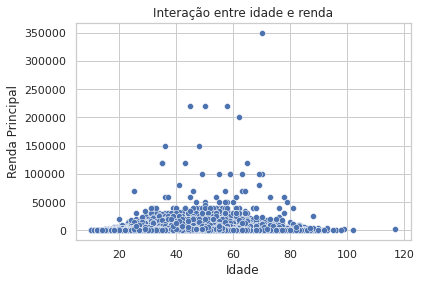

In [ ]:
sns.scatterplot(x='Idade', y='Renda Principal', data=dados)
plt.title('Interação entre idade e renda')
plt.show()

**Sexo**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


[Text(0, 0.5, 'Frequência'), Text(0.5, 0, '')]

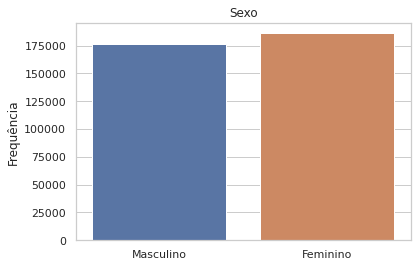

In [ ]:
sexo = sns.countplot(dados['Sexo'])
sexo.set_title('Sexo')
sexo.set(xlabel='', ylabel='Frequência')

**Cor da Pele**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


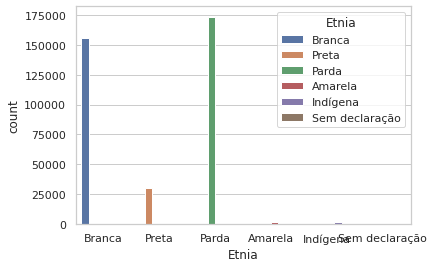

In [ ]:
cor_da_pele = sns.countplot(x='Etnia', hue='Etnia', data=dados)

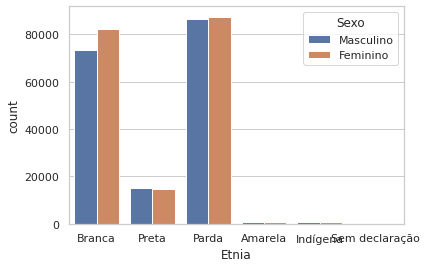

In [ ]:
sns.countplot(x='Etnia', hue='Sexo', data=dados)

**Renda x Sexo**

(0.0, 3000.0)

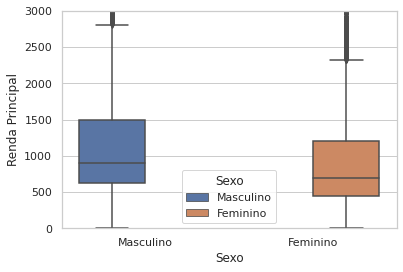

In [ ]:
sns.boxplot(x='Sexo', y='Renda Principal', hue='Sexo', data=dados)
plt.ylim(0, 3000)

**Renda x Etnia**

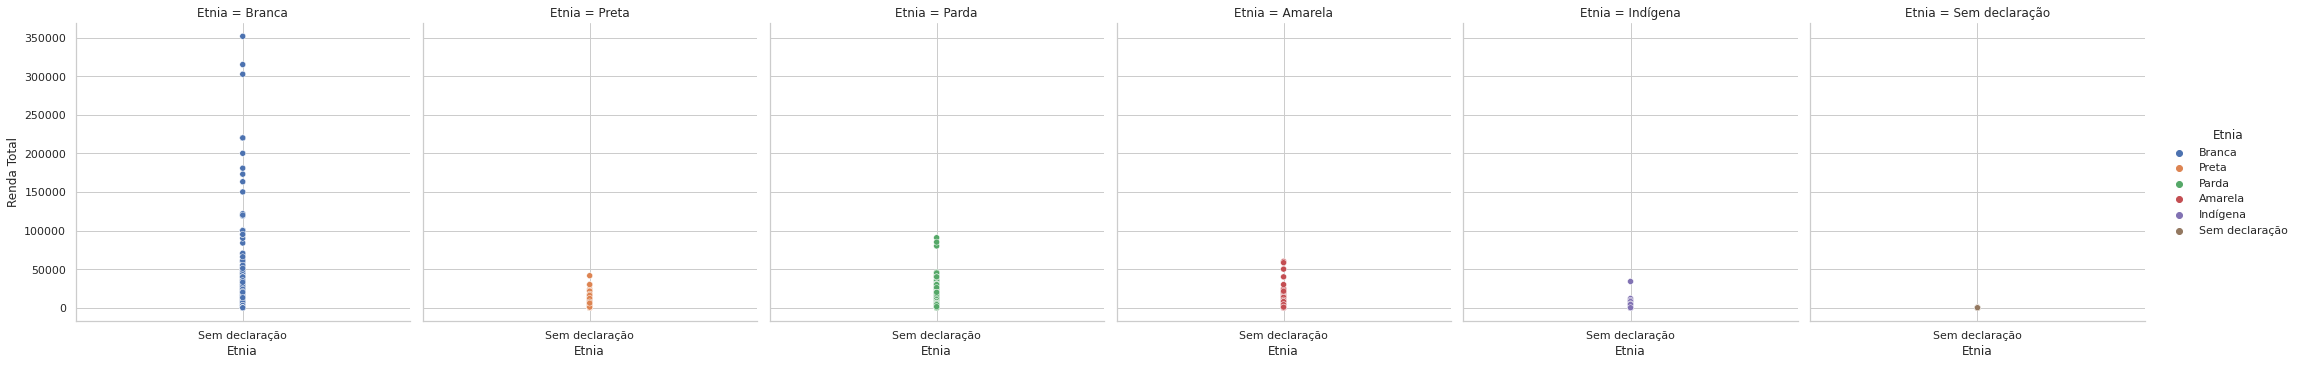

In [ ]:
sns.relplot(x='Etnia', y='Renda Total', hue='Etnia', col='Etnia', data=dados)

(0.0, 3000.0)

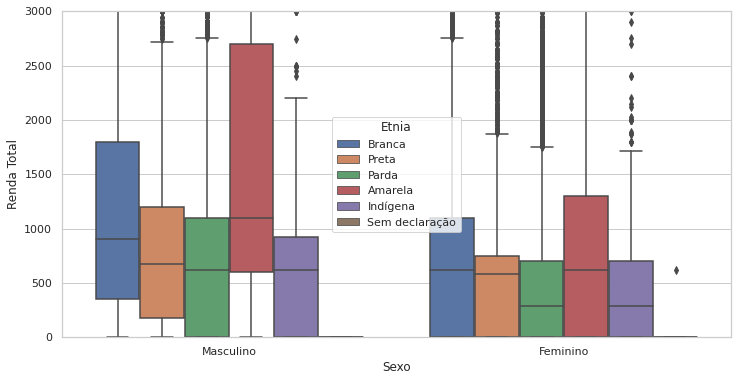

In [ ]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='Sexo', y='Renda Total', hue='Etnia', data=dados)
plt.ylim(0, 3000)

# Tratando a variável renda de todos os trabalhos

**Extraindo uma amostra de pessoas entre 18 e 80 anos**

In [ ]:
dados

,Ano,Estado,Sexo,Idade,Etnia,Escolaridade,Renda Principal,Renda Total,Peso Amostral
0,2012,Rondônia,Masculino,48,Branca,15 anos ou mais,3000.0,3000.0,232
1,2012,Rondônia,Feminino,48,Branca,15 anos ou mais,3000.0,3000.0,232
2,2012,Rondônia,Feminino,23,Branca,15 anos ou mais,1100.0,1100.0,232
3,2012,Rondônia,Feminino,21,Branca,14 anos,1100.0,1100.0,232
4,2012,Rondônia,Feminino,54,Branca,15 anos ou mais,NaN,460.0,232
...,...,...,...,...,...,...,...,...,...
362446,2012,Distrito Federal,Feminino,51,Branca,15 anos ou mais,NaN,0.0,290
362447,2012,Distrito Federal,Masculino,53,Branca,12 anos,20000.0,20000.0,290
362448,2012,Distrito Federal,Masculino,21,Branca,13 anos,NaN,0.0,290
362449,2012,Distrito Federal,Masculino,19,Branca,13 anos,NaN,0.0,290


In [ ]:
amostra = dados.loc[(dados['Idade'] >= 18) & (dados['Idade'] <= 80) & (dados['Renda Total'] > 0)]
amostra.describe()

,Ano,Idade,Renda Principal,Renda Total,Peso Amostral
count,200443.0,200443.000000,157281.000000,200443.000000,200443.000000
mean,2012.0,42.480511,1420.021827,1458.514710,547.126849
std,0.0,15.657019,2702.088821,2937.432182,261.446124
min,2012.0,18.000000,0.000000,1.000000,174.000000
25%,2012.0,30.000000,622.000000,622.000000,334.000000
50%,2012.0,40.000000,850.000000,802.000000,523.000000
75%,2012.0,54.000000,1500.000000,1500.000000,705.000000
max,2012.0,80.000000,350000.000000,351600.000000,1132.000000


In [ ]:
amostra.groupby(['Etnia', 'Sexo']).agg({'Renda Total': 'mean'})


Renda Total
Etnia          Sexo                  
Amarela        Feminino   2041.119048
               Masculino  3389.325792
Branca         Feminino   1505.658569
               Masculino  2257.939164
Indígena       Feminino    923.272455
               Masculino  1307.967123
Parda          Feminino    887.403685
               Masculino  1317.552160
Preta          Feminino    869.895289
               Masculino  1277.578274
Sem declaração Feminino    622.000000